# Data Understanding and Exploration
# Load the Dataset into a Pandas DataFrame

In [278]:
import pandas as pd

# Load the dataset
df = pd.read_csv('diabetes.csv')

# Display the first few rows of the dataset
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


 # Perform Exploratory Data Analysis (EDA)
# Summarize Data Distributions for All Features:

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

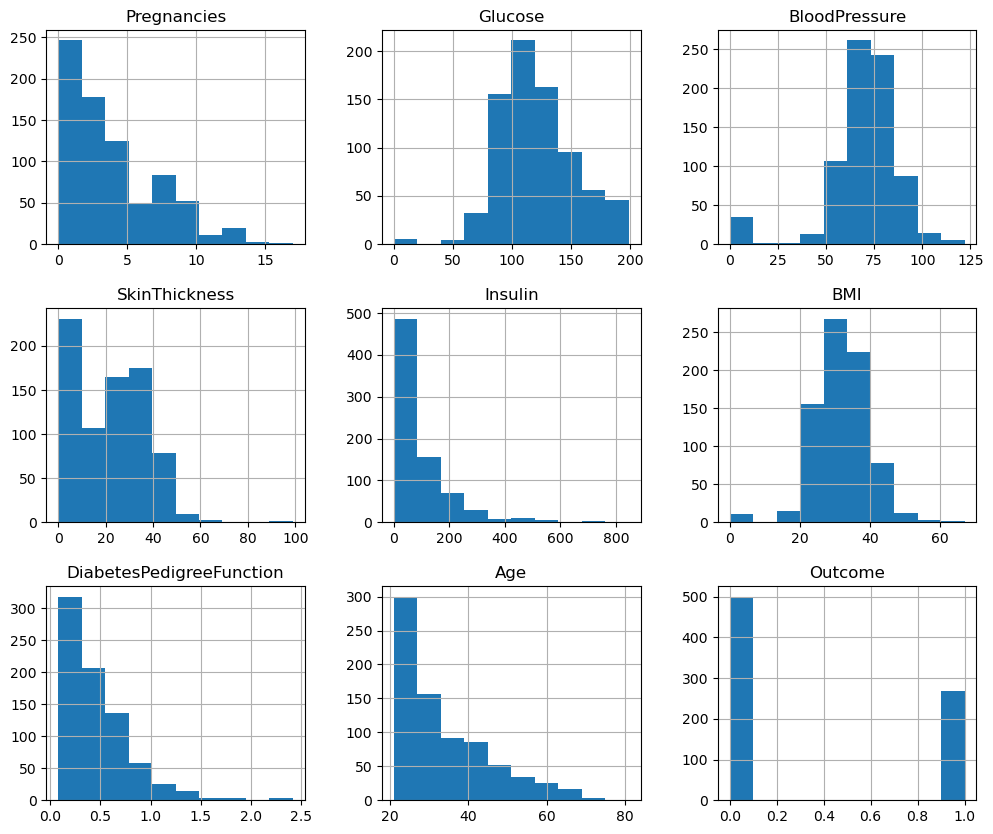

In [280]:
# Get basic statistics of the dataset
print(df.describe())

# Plot histograms for each feature
df.hist(figsize=(12, 10))
plt.show()

# Identify Missing Values, Outliers, and Any Data Quality Issues:



Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


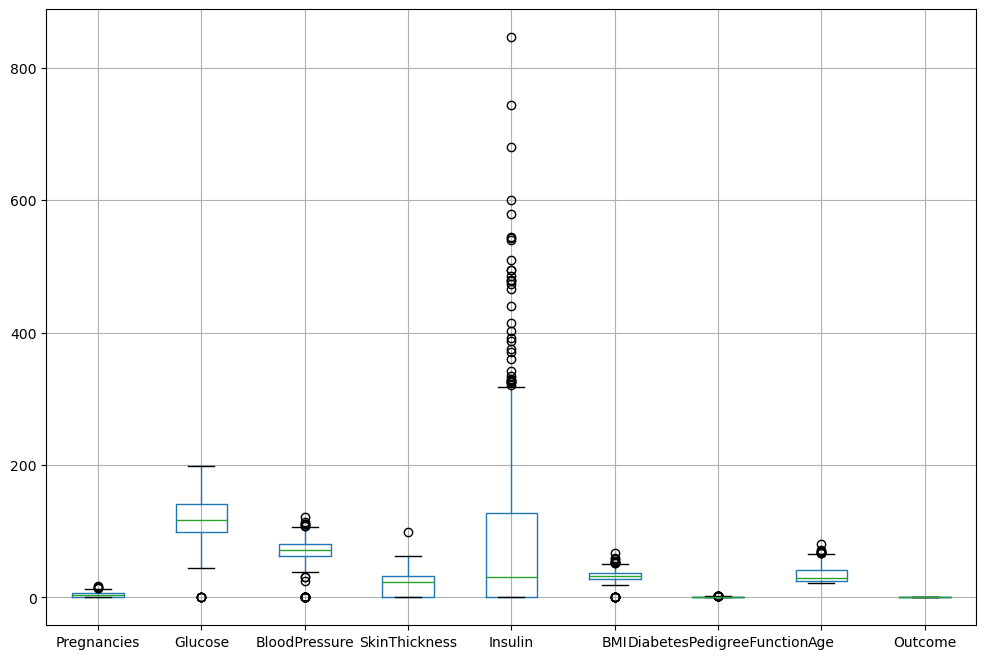

In [281]:
# Check for missing values
print(df.isnull().sum())

# Check for outliers using boxplots
plt.figure(figsize=(12, 8))
df.boxplot()
plt.show()


# Visualize Relationships Between Features and the Target Variable:



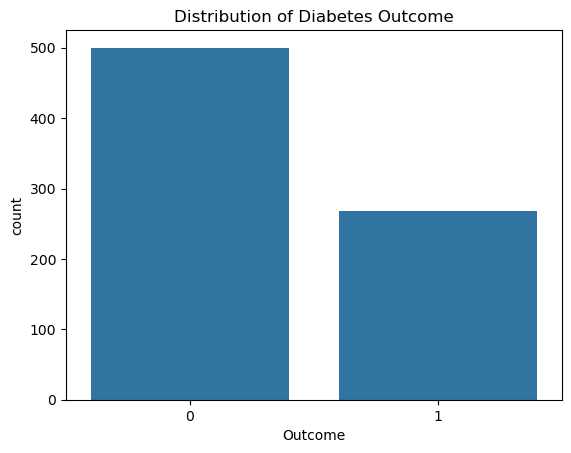

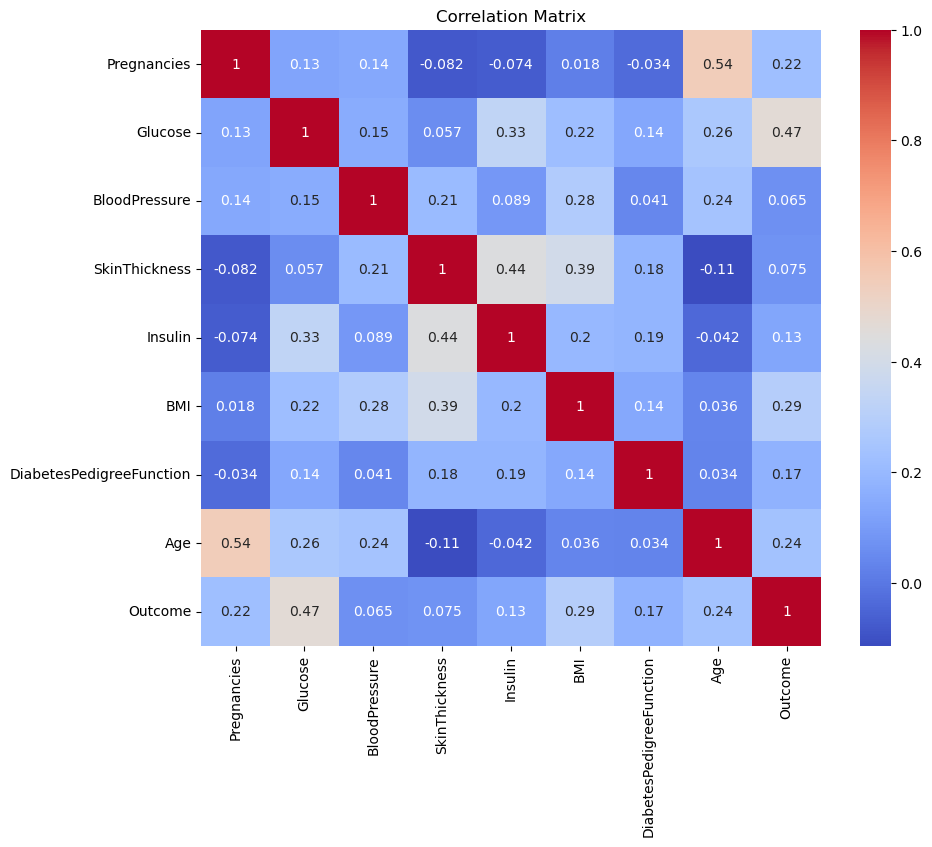

In [282]:
# Plot the distribution of the target variable
sns.countplot(x='Outcome', data=df)
plt.title('Distribution of Diabetes Outcome')
plt.show()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Data Preprocessing
# Handle Missing Values, Inconsistencies, and Outliers:

In [390]:
import pandas as pd
import numpy as np
import difflib  # Helps find similar column names

# Load dataset (Ensure correct path)
df = pd.read_csv("diabetes.csv")

# Standardize column names (strip spaces, convert to lowercase)
df.columns = df.columns.str.strip().str.lower()

# Expected column names (lowercase)
expected_columns = ['glucose', 'bloodpressure', 'skinthickness', 'insulin', 'bmi']

# Find best matching columns in case of slight mismatches
actual_columns = df.columns.tolist()
column_mapping = {col: difflib.get_close_matches(col, actual_columns, n=1, cutoff=0.6) for col in expected_columns}

# Replace missing columns with best match
mapped_columns = {col: matches[0] for col, matches in column_mapping.items() if matches}

# If some expected columns are still missing, raise an error
missing_columns = [col for col in expected_columns if col not in mapped_columns]
if missing_columns:
    raise KeyError(f"Missing columns in DataFrame and no close match found: {missing_columns}")

# Rename columns to match expected names
df.rename(columns=mapped_columns, inplace=True)

# Replace 0 values with NaN for identified columns
df[expected_columns] = df[expected_columns].replace(0, np.nan)

# Fill NaN values with median
df.fillna(df.median(numeric_only=True), inplace=True)

# Print updated column names and save cleaned file
print("Updated Columns:", df.columns.tolist())


Updated Columns: ['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin', 'bmi', 'diabetespedigreefunction', 'age', 'outcome']



# Scale or Normalize Numerical Features:

In [388]:
from sklearn.preprocessing import StandardScaler

# Split the data into features and target
X = df.drop('outcome', axis=1)
y = df['outcome']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the Dataset into Training and Testing Sets:

In [386]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the Selected Model Using the Preprocessed Training Data:

In [286]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

LogisticRegression()

# Tune the Model’s Hyperparameters Using Cross-Validation:



In [287]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

# Initialize GridSearchCV
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)

# Perform grid search
grid_search.fit(X_train, y_train)

# Best parameters and score
print('Best Parameters:', grid_search.best_params_)
print('Best Score:', grid_search.best_score_)

Best Parameters: {'C': 1}
Best Score: 0.7687724910035986


# Model Evaluation and Analysis
 # Make Predictions on the Testing Data:

In [288]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the Model's Performance Using Appropriate Metrics:

In [289]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred))

Accuracy: 0.7532467532467533
Confusion Matrix:
 [[82 17]
 [21 34]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154

ROC AUC Score: 0.7232323232323232


# Visualize the Model Performance:

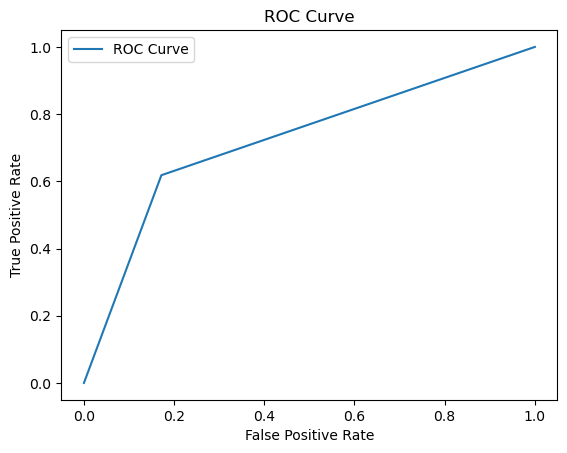

In [290]:
from sklearn.metrics import roc_curve

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Compare Performance Against a Baseline:

In [291]:
from sklearn.dummy import DummyClassifier

# Initialize the dummy classifier
dummy_clf = DummyClassifier(strategy="most_frequent")

# Train the dummy classifier
dummy_clf.fit(X_train, y_train)

# Make predictions
y_pred_dummy = dummy_clf.predict(X_test)

# Evaluate the dummy classifier
print('Dummy Classifier Accuracy:', accuracy_score(y_test, y_pred_dummy))

Dummy Classifier Accuracy: 0.6428571428571429


# Diabetes Prediction Model Using Random Forest Classifier

In [392]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import joblib

# Load the Pima Indians Diabetes dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = [
    "pregnancies", "glucose", "blood_pressure", "skin_thickness", "insulin",
    "bmi", "diabetes_pedigree_function", "age", "outcome"
]
df = pd.read_csv(url, header=None, names=columns)

# Split data into features (X) and target (y)
X = df.drop("outcome", axis=1)
y = df["outcome"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the scaler and scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a RandomForestClassifier model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Save the trained model and scaler
joblib.dump(model, "diabetes_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("Model and scaler saved successfully.")


Model and scaler saved successfully.


In [297]:
pip install fastapi uvicorn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [298]:
import joblib
joblib.dump(model,"model.joblib")

['model.joblib']